In [1]:
# %matplotlib widget
from because.probability import prob

from because.synth import read_data
from because.visualization import viz

r = read_data.Reader('/home/arun/HPCC-covid19/LLCP/llcpA.csv')
ds = r.read()

ps = prob.ProbSpace(ds)

hbe:  0.9490824254306831
getData:  290759 records read.


# Question: Charactersitics of a person and their effect on Diabetes?

Related variables: Diabetes, Age, Height, Weight, BMI, Income, Physical Activity, Employment

# Step 1: Examining the individual variables.

Viz.show: Target =  [('diabetes',), ('age',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['diabetes', 'age']


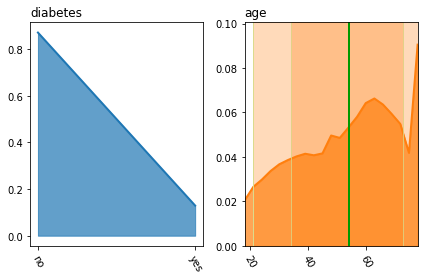

Viz.show: Target =  [('height',), ('weight',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['height', 'weight']


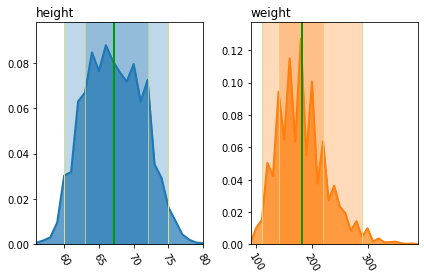

Viz.show: Target =  [('bmi',), ('income',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['bmi', 'income']


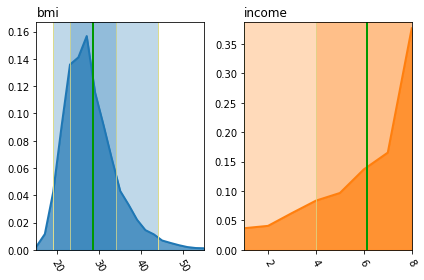

Viz.show: Target =  [('employment',), ('physicalactivity',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['employment', 'physicalactivity']


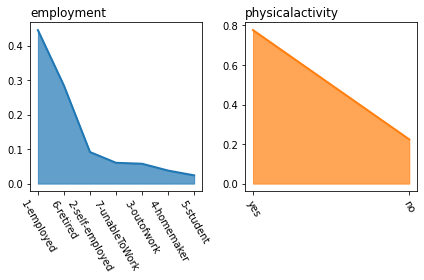

In [2]:
viz.show(probspace=ps, targetSpec=[('diabetes'),('age')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('height'),('weight')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('bmi'), ('income')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('employment'), ('physicalactivity')], condSpec=[], gtype='multi')

Step 2: Examining the relationship between the variables.